# Solution2

## Import libraries

In [1]:
import geemap
import ee
import geopandas as gpd

## Explore vector file

In [2]:
gdf = gpd.read_file("NAKHON RATCHASIMA_L1_2021_delgeom/NAKHON RATCHASIMA_L1_2021_delgeom.geojson")
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   auid      249 non-null    int64   
 1   geometry  249 non-null    geometry
dtypes: geometry(1), int64(1)
memory usage: 4.0 KB


### SMAP in study area

In [3]:
# call map function
Map = geemap.Map()

# set input
vector_input = "data/RATCHASIMA.geojson"
vector_input = vector_input # to show polygon on map
vector = geemap.geojson_to_ee(vector_input)

# collect the satellite image
soil_moisture = ee.ImageCollection("NASA/SMAP/SPL4SMGP/007") 

ssm = soil_moisture.select('sm_surface')

filter_date = ssm.filterDate("2021-05-01","2021-05-31")

average_ssm = filter_date.reduce(ee.Reducer.mean())

study_area = average_ssm.clip(vector)
               
#for visualize
soilMositureSurfaceVis = { "min": 0.0, "max": 0.9, "palette": ['0300ff', '418504', 'efff07', 'efff07', 'ff0303'],}

# add to map
Map.centerObject(vector,9) # zoom level 
Map.add_basemap("HYBRID")
Map.addLayer(vector, {'color':'red', "opacity": 0.7}, "paddy field") # polygon
Map.addLayer(study_area, soilMositureSurfaceVis, "SM Surface") # soil moisture surface

# display map
Map

Map(center=[14.957015162806202, 102.10918947304316], controls=(WidgetControl(options=['position', 'transparent…

ตัวอย่าง Interactive map of GEE

![image.png](data/sm.jpg)

### Monthly Soil Moisture on Paddy field in 2022 

In [4]:
# call map function
Map2 = geemap.Map()

# set input
vector_input = "NAKHON RATCHASIMA_L1_2021_delgeom/NAKHON RATCHASIMA_L1_2021_delgeom.geojson"
vector_input = vector_input # to show polygon on map
vector = geemap.geojson_to_ee(vector_input)

# collect the satellite image
dataset = ee.ImageCollection("NASA/SMAP/SPL4SMGP/007") \
                .filterBounds(vector) \
                .filterDate("2022-01-01","2022-12-31") \
                .select('sm_surface') \

# mean of soil moisture by montly               
sm_Jan = dataset.filterDate("2022-01-01","2022-01-31") \
                           .mean() \
                           .clip(vector)\
                           
sm_Feb = dataset.filterDate("2022-02-01","2022-02-28") \
                           .mean() \
                           .clip(vector)\
                           
sm_Mar = dataset.filterDate("2022-03-01","2022-03-31") \
                           .mean() \
                           .clip(vector)\
                           
sm_Apl = dataset.filterDate("2022-04-01","2022-04-30") \
                           .mean() \
                           .clip(vector)\
                           
sm_May = dataset.filterDate("2022-05-01","2022-05-31") \
                           .mean() \
                           .clip(vector)\
                    
sm_Jun = dataset.filterDate("2022-06-01","2022-06-30") \
                           .mean() \
                           .clip(vector)\
                           
sm_Jul = dataset.filterDate("2022-07-01","2022-07-31") \
                           .mean() \
                           .clip(vector)\
                           
sm_Aug = dataset.filterDate("2022-08-01","2022-08-31") \
                           .mean() \
                           .clip(vector)\
                           
sm_Sep = dataset.filterDate("2022-09-01","2022-09-30") \
                           .mean() \
                           .clip(vector)\
                           
sm_Oct = dataset.filterDate("2022-10-01","2022-10-31") \
                           .mean() \
                           .clip(vector)\
                           
sm_Nov = dataset.filterDate("2022-11-01","2022-11-30") \
                           .mean() \
                           .clip(vector)\
                           
sm_Dec = dataset.filterDate("2022-12-01","2022-12-31") \
                           .mean() \
                           .clip(vector)\
                                                                                                             
#for visualize
soilMositureSurfaceVis = { "min": 0.0, "max": 0.9, "palette": ['0300ff', '418504', 'efff07', 'efff07', 'ff0303'],}

# add to map
Map2.centerObject(vector,13) # zoom level 13
Map2.add_basemap("HYBRID")
Map2.addLayer(vector, {'color':'black', "opacity": 0.8}, "paddy field") # polygon
# monthly
Map2.addLayer(sm_Jan , soilMositureSurfaceVis, "SM Jan")
Map2.addLayer(sm_Feb , soilMositureSurfaceVis, "SM Feb")
Map2.addLayer(sm_Mar , soilMositureSurfaceVis, "SM Mar")
Map2.addLayer(sm_Apl , soilMositureSurfaceVis, "SM Apl")
Map2.addLayer(sm_May , soilMositureSurfaceVis, "SM May")
Map2.addLayer(sm_Jun , soilMositureSurfaceVis, "SM Jun")
Map2.addLayer(sm_Jul , soilMositureSurfaceVis, "SM Jul")
Map2.addLayer(sm_Aug , soilMositureSurfaceVis, "SM Aug")
Map2.addLayer(sm_Sep , soilMositureSurfaceVis, "SM Sep")
Map2.addLayer(sm_Oct , soilMositureSurfaceVis, "SM Oct")
Map2.addLayer(sm_Nov , soilMositureSurfaceVis, "SM Nov")
Map2.addLayer(sm_Dec , soilMositureSurfaceVis, "SM Dec")

# display map
Map2

Map(center=[15.468944419129967, 102.48651924174166], controls=(WidgetControl(options=['position', 'transparent…

ตัวอย่าง Interactive map of GEE

![image.png](data/sm2.jpg)

## SMAP value extraction

Case study: เพื่อระบุพื้นที่นาข้าวที่ได้รับผลกระทบจากภัยแล้งในปี2023


สกัดข้อมูล SMAP รายเดือนย้อนหลัง 5 ปี(2018-2022) ของแต่ละ polygons of paddy field,  เพื่อกำหนดค่าเกณฑ์มาตราฐานในการระบุพื้นที่ที่ได้รับผลกระทบภัยแล้ง

โดยกระบวนการสกัดข้อมูลนี้จะทำบน  Google Earth Engine ([SPL4SMGP.007 SMAP L4](https://developers.google.com/earth-engine/datasets/catalog/NASA_SMAP_SPL4SMGP_007#bands)) และทำการ cleansing data จัดเรียงข้อมูลโดยใช้ Geopandas library 

### Condition:
 We would like to know:

 How many rice fields affected by drought. Based on the conditions, Soil moisture (SMAP) must less than Soil hydraulic.

 - `Soil hydraulic` refer to the parameter that can represent the properties of soil in Area of interest.

 Thus, This case study use the statistic of SMAP(Soil moisture) values to find how many rice fields affected by drought.

### Explore the SMAP extracted output

In [5]:
path = "SMAP_data.geojson"

gdf = gpd.read_file(path)
gdf.head()

,id,auid,month,mean_2018,mean_2019,mean_2020,mean_2021,mean_2022,mean_2023,1822min,1822max,1822med,1822mean,geometry
0,0_00000000000000000016,0,1,0.081251,0.075551,0.047230,0.118344,0.122099,0.177722,0.047230,0.122099,0.081251,0.088895,"POLYGON ((102.45472 15.48656, 102.45526 15.485..."
1,1_00000000000000000016,0,2,0.072895,0.056710,0.044990,0.127434,0.153058,0.123690,0.044990,0.153058,0.072895,0.091017,"POLYGON ((102.45472 15.48656, 102.45526 15.485..."
2,2_00000000000000000016,0,3,0.136289,0.041395,0.220075,0.093152,0.067899,0.089064,0.041395,0.220075,0.093152,0.111762,"POLYGON ((102.45472 15.48656, 102.45526 15.485..."
3,3_00000000000000000016,0,4,0.113250,0.066749,0.140718,0.215029,0.154320,0.050429,0.066749,0.215029,0.140718,0.138013,"POLYGON ((102.45472 15.48656, 102.45526 15.485..."
4,4_00000000000000000016,0,5,0.276068,0.279413,0.193515,0.166937,0.232502,0.204456,0.166937,0.279413,0.232502,0.229687,"POLYGON ((102.45472 15.48656, 102.45526 15.485..."


### Visualize statistic data for Drought monitoring

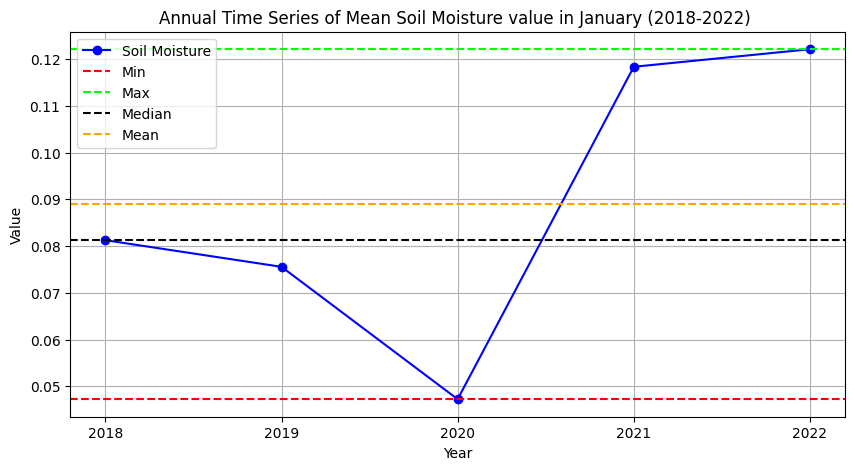

In [6]:
import matplotlib.pyplot as plt

# plot first row value
row_to_plot = gdf.iloc[0]

# Extract the values for the specified columns
years = [2018, 2019, 2020, 2021, 2022]
mean_values = [row_to_plot[f'mean_{year}'] for year in years]
min_value = row_to_plot['1822min']
max_value = row_to_plot['1822max']
med_value = row_to_plot['1822med']
mean_value = row_to_plot['1822mean']

# Plot the time series
plt.figure(figsize=(10, 5))
plt.plot(years, mean_values, marker='o', label='Soil Moisture', color='blue')
plt.axhline(y=min_value, linestyle='--', label='Min', color='red')
plt.axhline(y=max_value, linestyle='--', label='Max', color='lime')
plt.axhline(y=med_value, linestyle='--', label='Median', color='black')
plt.axhline(y=mean_value, linestyle='--', label='Mean', color='orange')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Annual Time Series of Mean Soil Moisture value in January (2018-2022) ')
plt.legend()
plt.grid(True)
plt.xticks(years)
plt.show()

จากกราฟข้างบนแสดง ค่าเฉลี่ยของ Soil Moisture ในแต่ละปีตั้งแต่ปี 2018-2022 ของเดือนมกราคม บนแปลงข้าวที่มี  `auid = 0` รวมถึงค่าเฉลี่ยและค่ากลางโดยรวมทุกปีของค่า Soil moisture บนเส้นสีส้มและสีดำตามลำดับ

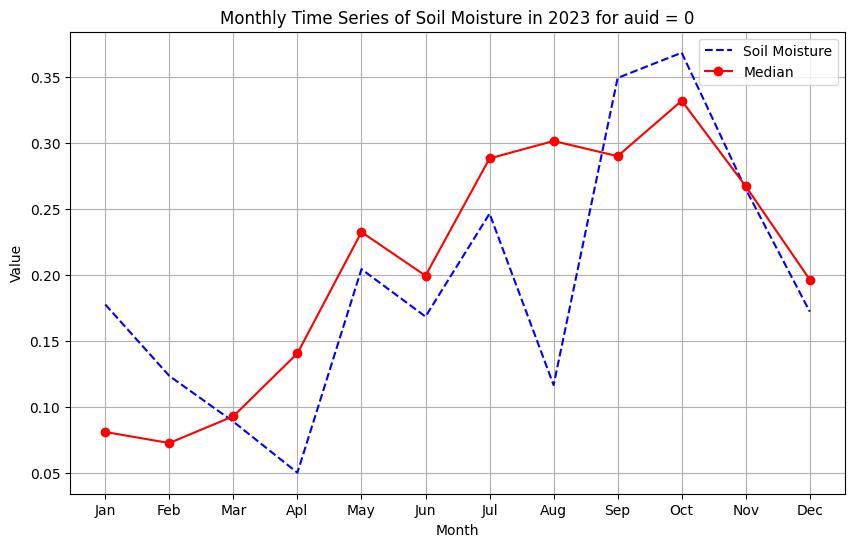

In [7]:
import matplotlib.pyplot as plt

# Filter rows where 'auid' is 0
filtered_data = gdf[gdf['auid'] == 0]

# Extract values for 'month', 'mean_2023', and '1822med'
months = filtered_data['month']
mean_2023_values = filtered_data['mean_2023']
med_1822_values = filtered_data['1822med']
m = ['Jan', 'Feb','Mar','Apl','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

# Plot the time series for 'mean_2023'
plt.figure(figsize=(10, 6))
plt.plot(months, mean_2023_values, linestyle='--', color='blue', label='Soil Moisture')
plt.xlabel('Month')
plt.ylabel('Value')
plt.title('Monthly Time Series of Soil Moisture in 2023 for auid = 0')
plt.grid(True)
plt.xticks(months, m)

# Plot the time series for '1822med'
plt.plot(months, med_1822_values, marker='o', color='red', label='Median')

plt.legend() # Add legend
plt.show()


จากกราฟข้างบน `ค่า Median`  คือ ค่ากลางจะสถิติย้อนหลัง 5 ปี (2018-2022) ของ Soil Moisture บนแปลงข้าว `auid=0`

โดยจะเห็นว่าในปี 2023 ช่วงเดือนมีนาคม-สิงหาคม และเดือนพฤศจิกายน-ธันวาคม มีค่าเฉลี่ยของ Soil Moisture ต่ำกว่าค่ามัธยฐานหรือค่ากลาง ซึ่งหมายถึงแปลงข้าวแปลงนี้ได้รับผลกระทบจากภัยแล้งในช่วงเดือนเหล่านี้

## Detecting affected paddy field from Drought of each month in 2023

In [8]:
# Create new column 'detect' based on condition
gdf['detect'] = gdf.apply(lambda row: 'No Drought' if row['mean_2023'] > row['1822med'] else 'Affected Drought', axis=1)

# arrange column
desired_columns = ['id', 'auid', 'month', 'mean_2018', 'mean_2019', 'mean_2020', 'mean_2021', 'mean_2022', 'mean_2023','1822min','1822max','1822med','1822mean','detect', 'geometry']
gdf_new = gdf[desired_columns]

# # Save the modified GeoDataFrame to a new GeoJSON file
# output_file = "Drought_detect.geojson"
# gdf_new.to_file(output_file, driver='GeoJSON')

# show table
gdf_new.head()

,id,auid,month,mean_2018,mean_2019,mean_2020,mean_2021,mean_2022,mean_2023,1822min,1822max,1822med,1822mean,detect,geometry
0,0_00000000000000000016,0,1,0.081251,0.075551,0.047230,0.118344,0.122099,0.177722,0.047230,0.122099,0.081251,0.088895,No Drought,"POLYGON ((102.45472 15.48656, 102.45526 15.485..."
1,1_00000000000000000016,0,2,0.072895,0.056710,0.044990,0.127434,0.153058,0.123690,0.044990,0.153058,0.072895,0.091017,No Drought,"POLYGON ((102.45472 15.48656, 102.45526 15.485..."
2,2_00000000000000000016,0,3,0.136289,0.041395,0.220075,0.093152,0.067899,0.089064,0.041395,0.220075,0.093152,0.111762,Affected Drought,"POLYGON ((102.45472 15.48656, 102.45526 15.485..."
3,3_00000000000000000016,0,4,0.113250,0.066749,0.140718,0.215029,0.154320,0.050429,0.066749,0.215029,0.140718,0.138013,Affected Drought,"POLYGON ((102.45472 15.48656, 102.45526 15.485..."
4,4_00000000000000000016,0,5,0.276068,0.279413,0.193515,0.166937,0.232502,0.204456,0.166937,0.279413,0.232502,0.229687,Affected Drought,"POLYGON ((102.45472 15.48656, 102.45526 15.485..."


### Export by month

In [9]:
# Load your GeoJSON file into a GeoDataFrame
gdf = gpd.read_file('Drought_detect.geojson')

# Define a dictionary to map integer month values to month names
month_names = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

# Loop through each month and export to a separate GeoJSON file
for month, name in month_names.items():
    # Filter the GeoDataFrame by month
    gdf_month = gdf[gdf['month'] == month]
    
    # Define the output file name
    output_file = f'{name}.geojson'
    
    # Export the filtered GeoDataFrame to a GeoJSON file
    gdf_month.to_file(output_file, driver='GeoJSON')

    print(f'Exported {output_file}')


Exported January.geojson
Exported February.geojson
Exported March.geojson
Exported April.geojson
Exported May.geojson
Exported June.geojson
Exported July.geojson
Exported August.geojson
Exported September.geojson
Exported October.geojson
Exported November.geojson
Exported December.geojson


## Visualize output on interactive map

The Interactive map below show the output of March (`March.geojson`) for drought detection.

In [10]:
# Read the GeoJSON file
output = gpd.read_file('March.geojson')

# Display map
m = output.explore(column='detect',
                tooltip=['auid','detect'],
                legend=True,
                popup=True,
                cmap= 'RdYlGn',
                name='March')

m

### How many paddy field affected by Drought

In [11]:
# Count the number of rows where 'detect' is 'Affected Drought'
num_affected_drought = len(output[output['detect'] == 'Affected Drought'])

# Print the result
print(f"Number of paddy field affected from Drought': {num_affected_drought}")

Number of paddy field affected from Drought': 174


-----------------------
# Other Idea to detect Drought

เราสามารถใช้ `ค่า SPEI (Standardised Precipitation-Evapotranspiration Index)` มาเป็นหนึ่งในการตรวจจับพื้นที่ภัยแล้ง โดยจากงานวิจัยต่างๆนิยมใช้ข้อมูลทางอุตุนิยมวิทยา และข้อมูลความชื้นในดินในการตรวจจับพื้นที่ภัย อาทิเช่น ([Arpakorn Wongsit, 2021](http://ir.buu.ac.th/dspace/bitstream/1513/380/1/62910177.pdf)) โดย ค่า SPEI ที่น้อยกว่า 0 แสดงถึงภาวะแห้งแล้ง และค่ามากกว่า 0 แสดงถึงภาวะชื้น 

![.](data/norm3.jpg)


อ้างอิงจาก [Thai Meteorogical Department](http://www.rnd.tmd.go.th/droughtanalysis/)




### Scope:
##### This case study will use 20 paddy fields at Nakhon Ratchasima province in 2022 by integration of SMAP and SPEI paremeters.

The medthod:
- Extract [SMAP](https://developers.google.com/earth-engine/datasets/catalog/NASA_SMAP_SPL4SMGP_007) and [SPEI](https://developers.google.com/earth-engine/datasets/catalog/CSIC_SPEI_2_9) data from Google Earth Engine
- Data Preparation and Cleansing data
- Data Normalization (convert SMAP)
- Detect Drought

------------------------------------------------


## Extract data
from Google Earth Engine

[SMAP](https://developers.google.com/earth-engine/datasets/catalog/NASA_SMAP_SPL4SMGP_007) (SPL4SMGP.007 SMAP L4 Global 3-hourly 9-km Surface and Root Zone Soil Moisture)
- band `sm_surface` (min:0 and max:0.9) : Top layer soil moisture (0-5 cm).
- `Data available` : ( 2015-03-31 to 2024-05-11)


[SPEI](https://developers.google.com/earth-engine/datasets/catalog/CSIC_SPEI_2_9) (SPEIbase: Standardised Precipitation-Evapotranspiration Index database, Version 2.9)
- band `SPEI_12_month` (min:-2.33 and max:2.33) : Standardized Precipitation-Evapotranspiration Index (SPEI) where precipitation and evapotranspiration data was accumulated over the previous 12 months.
- `Data available` : ( 1901-01-01 to 2023-01-01)


## Data Preparation
- explore data
- join table
- arrabge column


In [12]:
path = "data/Alldata2022.geojson"

gdf = gpd.read_file(path)

gdf.head()

,auid,mean_2022,mean_SPEI,month,year,geometry
0,0,0.122099,0.810455,1,2022,"POLYGON ((102.45472 15.48656, 102.45526 15.485..."
1,0,0.153058,1.098147,2,2022,"POLYGON ((102.45472 15.48656, 102.45526 15.485..."
2,0,0.067899,1.375353,3,2022,"POLYGON ((102.45472 15.48656, 102.45526 15.485..."
3,0,0.154320,0.523527,4,2022,"POLYGON ((102.45472 15.48656, 102.45526 15.485..."
4,0,0.232502,1.249801,5,2022,"POLYGON ((102.45472 15.48656, 102.45526 15.485..."


## Data Normalization / Create new composite index

เพื่อปรับค่า `SMAP` และค่า `SPEI` ให้สามารถใช้ในการวิเคราะห์รวมกันได้ จึงต้องแปลงค่าให้อยู่ในรูปแบบที่สามารถเปรียบเทียบและวิเคราะห์ร่วมกันได้ 

โดยวิธีที่ง่ายที่สุดคือการปรับช่วง (normalization) โดยใช้สูตรดังนี้:

![.](data/norm1.jpg)

a และ 𝑏 เป็นค่าช่วงใหม่ที่ต้องการ เช่น -2.33 และ 2.33 ตามช่วงค่าของ `SPEI` ดังนี้

![.](data/norm2.jpg)

In [13]:
# calculate SMAP normalization
gdf['Sm_norm'] = (gdf['mean_2022'] / 0.9) * 4.66 - 2.33

# Calculate Composite Index
gdf['Composite_Index'] = (gdf['mean_SPEI'] + gdf['Sm_norm']) / 2.0

gdf.head(12)

,auid,mean_2022,mean_SPEI,month,year,geometry,Sm_norm,Composite_Index
0,0,0.122099,0.810455,1,2022,"POLYGON ((102.45472 15.48656, 102.45526 15.485...",-1.697800,-0.443673
1,0,0.153058,1.098147,2,2022,"POLYGON ((102.45472 15.48656, 102.45526 15.485...",-1.537500,-0.219677
2,0,0.067899,1.375353,3,2022,"POLYGON ((102.45472 15.48656, 102.45526 15.485...",-1.978435,-0.301541
3,0,0.154320,0.523527,4,2022,"POLYGON ((102.45472 15.48656, 102.45526 15.485...",-1.530966,-0.503720
4,0,0.232502,1.249801,5,2022,"POLYGON ((102.45472 15.48656, 102.45526 15.485...",-1.126158,0.061821
5,0,0.135274,1.289598,6,2022,"POLYGON ((102.45472 15.48656, 102.45526 15.485...",-1.629580,-0.169991
6,0,0.352143,1.602343,7,2022,"POLYGON ((102.45472 15.48656, 102.45526 15.485...",-0.506684,0.547829
7,0,0.346904,2.013372,8,2022,"POLYGON ((102.45472 15.48656, 102.45526 15.485...",-0.533808,0.739782
8,0,0.375667,2.196354,9,2022,"POLYGON ((102.45472 15.48656, 102.45526 15.485...",-0.384877,0.905738
9,0,0.412523,2.042363,10,2022,"POLYGON ((102.45472 15.48656, 102.45526 15.485...",-0.194046,0.924158


## Detect Drought 

โดยอิงตามเกณฑ์การจำแนกภัยแล้งตาม ค่า SPEI ที่น้อยกว่า 0 แสดงถึงภาวะแห้งแล้ง และค่ามากกว่า 0 แสดงถึงภาวะชื้น 

In [14]:
# classify drought
gdf['detect'] = gdf.apply(lambda row: 'No Drought' if row['Composite_Index'] > 0 else 'Affected Drought', axis=1)

gdf.head(12)

,auid,mean_2022,mean_SPEI,month,year,geometry,Sm_norm,Composite_Index,detect
0,0,0.122099,0.810455,1,2022,"POLYGON ((102.45472 15.48656, 102.45526 15.485...",-1.697800,-0.443673,Affected Drought
1,0,0.153058,1.098147,2,2022,"POLYGON ((102.45472 15.48656, 102.45526 15.485...",-1.537500,-0.219677,Affected Drought
2,0,0.067899,1.375353,3,2022,"POLYGON ((102.45472 15.48656, 102.45526 15.485...",-1.978435,-0.301541,Affected Drought
3,0,0.154320,0.523527,4,2022,"POLYGON ((102.45472 15.48656, 102.45526 15.485...",-1.530966,-0.503720,Affected Drought
4,0,0.232502,1.249801,5,2022,"POLYGON ((102.45472 15.48656, 102.45526 15.485...",-1.126158,0.061821,No Drought
5,0,0.135274,1.289598,6,2022,"POLYGON ((102.45472 15.48656, 102.45526 15.485...",-1.629580,-0.169991,Affected Drought
6,0,0.352143,1.602343,7,2022,"POLYGON ((102.45472 15.48656, 102.45526 15.485...",-0.506684,0.547829,No Drought
7,0,0.346904,2.013372,8,2022,"POLYGON ((102.45472 15.48656, 102.45526 15.485...",-0.533808,0.739782,No Drought
8,0,0.375667,2.196354,9,2022,"POLYGON ((102.45472 15.48656, 102.45526 15.485...",-0.384877,0.905738,No Drought
9,0,0.412523,2.042363,10,2022,"POLYGON ((102.45472 15.48656, 102.45526 15.485...",-0.194046,0.924158,No Drought


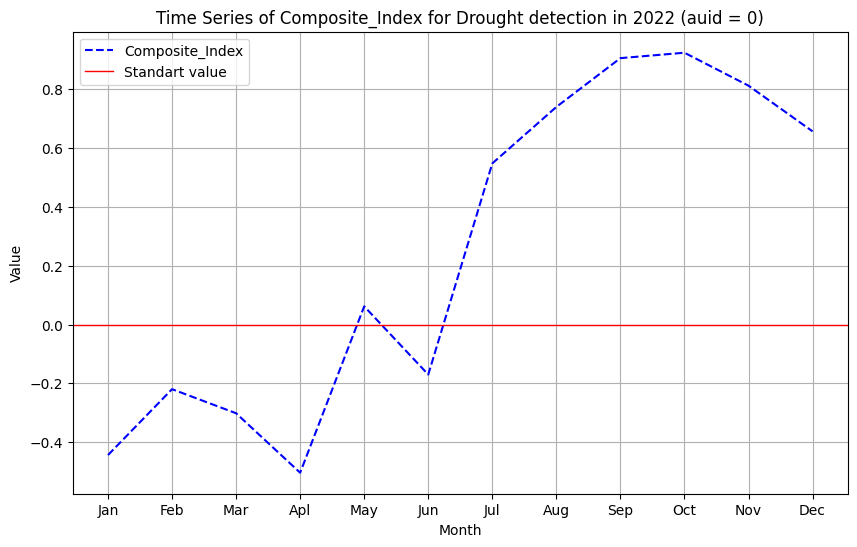

In [15]:
import matplotlib.pyplot as plt

# Filter rows where 'auid' is 0
filtered_data = gdf[gdf['auid'] == 0]

# Extract values 
months = filtered_data['month']
new_index = filtered_data['Composite_Index']

# set month
m = ['Jan', 'Feb','Mar','Apl','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

# Plot the time series for 'mean_2023'
plt.figure(figsize=(10, 6))
plt.plot(months, new_index, linestyle='--', color='blue', label='Composite_Index')
plt.axhline(y=0, color='red', linestyle='-', linewidth=1,  label='Standart value')
plt.xlabel('Month')
plt.ylabel('Value')
plt.title('Time Series of Composite_Index for Drought detection in 2022 (auid = 0)')
plt.grid(True)
plt.xticks(months, m)

plt.legend() # Add legend
plt.show()

## Export result by month

In [16]:
# Define a dictionary to map integer month values to month names
month_names = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

# Loop through each month and export to a separate GeoJSON file
for month, name in month_names.items():
    # Filter the GeoDataFrame by month
    gdf_month = gdf[gdf['month'] == month]
    
    # Define the output file name
    output_file = f'output/{name}.geojson'
    
    # Export the filtered GeoDataFrame to a GeoJSON file
    gdf_month.to_file(output_file, driver='GeoJSON')

    print(f'Exported {output_file}')

Exported output/January.geojson
Exported output/February.geojson
Exported output/March.geojson
Exported output/April.geojson
Exported output/May.geojson
Exported output/June.geojson
Exported output/July.geojson
Exported output/August.geojson
Exported output/September.geojson
Exported output/October.geojson
Exported output/November.geojson
Exported output/December.geojson


## Visualize output

จาก  Interactive map ด้านล่างแสดงถึงแปลงข้าวที่ได้รับผลกระทบจะภัยแล้งในช่วงเดือนมิถุนายน ปี2022 

โดยมีแปลงข้าวที่ได้รับผลกระทบจากภัยแล้ง จำนวน 18 แปลง จากทั้งหมด 20 แปลง

In [17]:
# Read the GeoJSON file
output = gpd.read_file('output/June.geojson')

# Display map
map = output.explore(column='detect',
                tooltip=['auid','detect'],
                legend=True,
                popup=True,
                cmap= 'RdYlGn',
                name='June')

# Count the number of rows where 'detect' is 'Affected Drought'
num_drought = len(output[output['detect'] == 'Affected Drought'])

# Print the result
print(f"Number of paddy field affected from Drought': {num_drought}")

Number of paddy field affected from Drought': 18


In [18]:
map